In [3]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
cond = df['Species'].isin(['Bream', 'Smelt'])

In [6]:
fish_data = df.loc[cond, ['Length2', 'Weight']]

In [7]:
fish_target = df.loc[cond, ['Species']]

In [8]:
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [10]:
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [12]:
from sklearn.model_selection import train_test_split

In [29]:
train_input, test_input, train_target, test_target, = train_test_split(fish_data, fish_target,stratify=fish_target, random_state=40) #stratify:일정한 비율을 맞추는 함수ㅣ

In [30]:
test_target

,Species
24,Bream
7,Bream
150,Smelt
5,Bream
12,Bream
1,Bream
6,Bream
30,Bream
27,Bream
155,Smelt


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
kn = KNeighborsClassifier()

In [35]:
train_target

,Species
149,Smelt
156,Smelt
32,Bream
154,Smelt
152,Smelt
20,Bream
10,Bream
145,Smelt
26,Bream
9,Bream


In [36]:
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [37]:
kn.score(test_input, test_target) #1.0:  채점 결과, 학습 잘된것

1.0

In [40]:
kn.predict([[50, 300]]) #predict 결과값(데이터)이 어디에 속하는지 예측 #컴퓨터가 원하는 배열이 2차원 배열이라서 대괄호를 한번더 씀

C:\Users\2-10\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

In [41]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

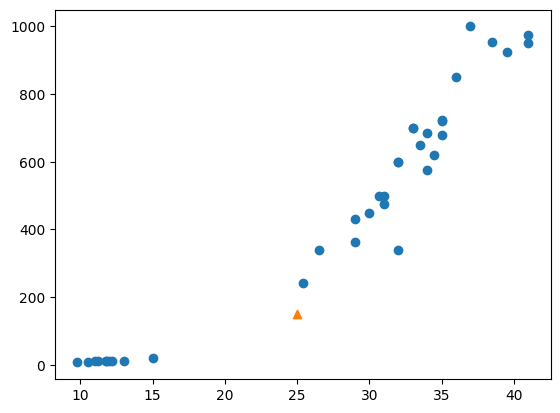

In [43]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')
plt.show

In [46]:
distance, indexes = kn.kneighbors([[25, 150]])

C:\Users\2-10\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [47]:
indexes

array([[23, 31,  1,  3, 10]])

In [49]:
n_df = train_input.iloc[indexes[0]]

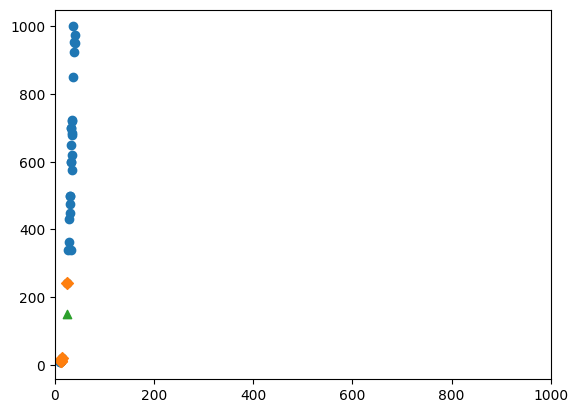

In [55]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'], n_df['Weight'], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlim(0, 1000)
plt.show()

- 표준점수 구하는 공식

```
(데이터 - 평균) / 표준편차

In [58]:
mean = train_input.mean()

In [59]:
std = train_input.std()

In [60]:
train_input.head()

,Length2,Weight
149,11.2,9.8
156,13.0,12.2
32,39.5,925.0
154,12.2,12.2
152,11.8,9.9


In [61]:
(train_input - mean).head()

,Length2,Weight
149,-16.213889,-452.913889
156,-14.413889,-450.513889
32,12.086111,462.286111
154,-15.213889,-450.513889
152,-15.613889,-452.813889


In [63]:
train_scaled = ((train_input - mean) / std)

In [64]:
new = ([25, 150] - mean) / std
new

Length2   -0.232394
Weight    -0.926813
dtype: float64

In [65]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [67]:
test_scaled = (test_input - mean) / std

In [68]:
kn.score(test_scaled, test_target)

1.0

In [69]:
kn.predict([new])

C:\Users\2-10\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## 펭귄데이터 연습

In [71]:
import seaborn as sns

In [136]:
df = sns.load_dataset('penguins')
df.head()
df = df.dropna() # 결측치를 빼주는 함수

In [137]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [138]:
df.groupby('species').sum()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,TorgersenTorgersenTorgersenTorgersenTorgersenT...,5668.3,2678.7,27755.0,541100.0,MaleFemaleFemaleFemaleMaleFemaleMaleFemaleMale...
Chinstrap,DreamDreamDreamDreamDreamDreamDreamDreamDreamD...,3320.7,1252.6,13316.0,253850.0,FemaleMaleMaleFemaleMaleFemaleFemaleMaleFemale...
Gentoo,BiscoeBiscoeBiscoeBiscoeBiscoeBiscoeBiscoeBisc...,5660.6,1784.6,25851.0,606000.0,FemaleMaleFemaleMaleMaleFemaleFemaleMaleFemale...


In [139]:
# Adelie, Chinstrap의 bill_depth_mm, flipper_length_mm 데이터를 비교 분석해보기교

In [140]:
cond = df['species'].isin(['Adelie', 'Chinstrap'])

In [141]:
pg_data = df.loc[cond, ['bill_depth_mm', 'flipper_length_mm']]

In [142]:
pg_target = df.loc[cond, ['species']]

In [143]:
pg_data.head()

,bill_depth_mm,flipper_length_mm
0,18.7,181.0
1,17.4,186.0
2,18.0,195.0
4,19.3,193.0
5,20.6,190.0


In [144]:
pg_target.head()

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie


In [145]:
from sklearn.model_selection import train_test_split

In [146]:
train_input, test_input, train_target, test_target, = train_test_split(pg_data, pg_target,stratify=pg_target, random_state=50) #stratify:일정한 비율을 맞추는 함수ㅣ

In [147]:
test_target

,species
178,Chinstrap
192,Chinstrap
204,Chinstrap
208,Chinstrap
7,Adelie
27,Adelie
215,Chinstrap
98,Adelie
165,Chinstrap
112,Adelie


In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
kn50 = KNeighborsClassifier(n_neighbors=50)

In [150]:
train_target

,species
206,Chinstrap
109,Adelie
211,Chinstrap
71,Adelie
25,Adelie
...,...
134,Adelie
60,Adelie
89,Adelie
13,Adelie


In [151]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [135]:
kn.score(test_input, test_target)

0.5925925925925926

In [130]:
kn.predict([[20, 100]])

C:\Users\2-10\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)

In [152]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

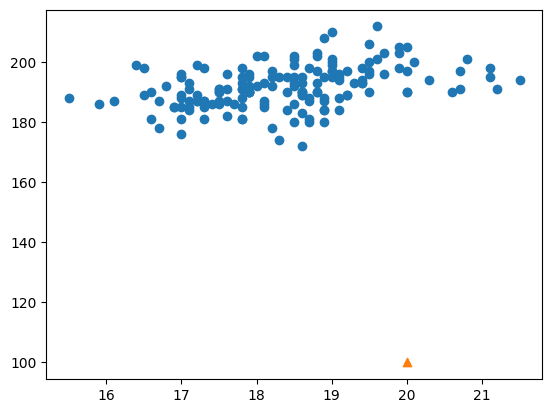

In [153]:
plt.scatter(train_input['bill_depth_mm'], train_input['flipper_length_mm'])
plt.scatter(20, 100, marker='^')
plt.show

In [154]:
distance, indexes = kn.kneighbors([[20, 100]])

C:\Users\2-10\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [155]:
indexes

array([[117,  94,  67,  51,  90]])

In [158]:
n_df = train_input.iloc[indexes[0]]

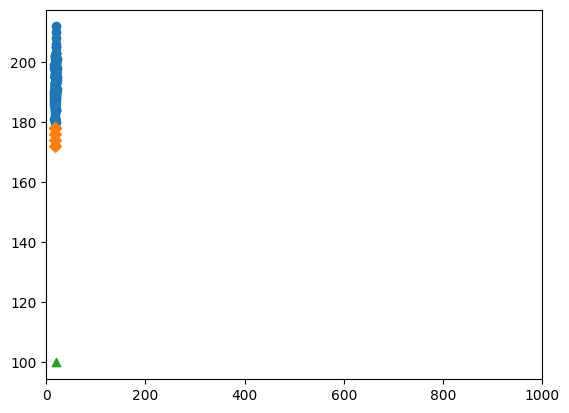

In [159]:
plt.scatter(train_input['bill_depth_mm'], train_input['flipper_length_mm'])
plt.scatter(n_df['bill_depth_mm'], n_df['flipper_length_mm'], marker='D')
plt.scatter(20, 100, marker='^')
plt.xlim(0, 1000)
plt.show()

In [160]:
mean = train_input.mean()

In [161]:
std = train_input.std()

In [162]:
train_input.head()

,bill_depth_mm,flipper_length_mm
206,17.3,187.0
109,19.0,197.0
211,19.4,194.0
71,18.4,190.0
25,18.9,187.0


In [163]:
(train_input - mean).head()

,bill_depth_mm,flipper_length_mm
206,-1.068125,-4.6375
109,0.631875,5.3625
211,1.031875,2.3625
71,0.031875,-1.6375
25,0.531875,-4.6375


In [164]:
train_scaled = ((train_input - mean) / std)

In [165]:
new = ([20, 100] - mean) / std
new

bill_depth_mm         1.435675
flipper_length_mm   -13.097819
dtype: float64

In [166]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [167]:
test_scaled = (test_input - mean) / std

In [168]:
kn.score(test_scaled, test_target)

0.6111111111111112

In [169]:
kn.predict([new])

C:\Users\2-10\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)

In [9]:
# 강사 답안 
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

In [10]:

df = sns.load_dataset('penguins')
df.head()
df = df.dropna()

NameError: name 'sns' is not defined